#### Practice Exploratory Data Analysis with Python
EDA: is the process of analyzing datasets to summarize their main characteristics, often using visual methods. The goal is to understand the structure of the data, detect anomalies, test hypotheses and check assumptions before moving into more complex analysis or modeling.

This notebook will be taking a look at historical ultramarathon data from 1798 and 2022.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Importing our data from downloads using Pandas read_csv

In [31]:
data = pd.read_csv(r"C:\Users\user\Downloads\archive (1)\TWO_CENTURIES_OF_UM_RACES.csv", low_memory=False)

Taking a look at our data using head()

In [32]:
data.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [33]:
#What "size is our data?
data.shape

(7461195, 13)

In [34]:
#What datatypes does our data have?
data.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

After we have scanned our data and have an understanding of the column names and datatypes we will clean up some of our column values, making them easier to work with later on. We are going to only filter for races in Poland, in 2016 with a 50km distance

In [35]:
#show 50km, making sure we can get the distances we want to filter for.
data[data['Event distance/length']== '50km']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461089,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:19:56 h,*QLD,AUS,1956.0,F,W35,11541.0,1046326
7461090,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:28:57 h,*QLD,AUS,1954.0,M,M40,11154.0,1070007
7461091,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:46:39 h,*QLD,AUS,1951.0,M,M40,10466.0,345672
7461092,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:47:39 h,*QLD,AUS,1939.0,M,M55,10429.0,1082443


##### Some observations from the data
The data is in DD/MM/YYYY format
Event distance has many different types of races
Athlete age category has both Age and Gender of the Athlete.

In [36]:
#show 50k, making sure we don't have any unforseen naming in our Event distance/length column. 
data[data['Event distance/length']== '50k']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID


This prints an empty dataframe, therefore no races followed a 50k naming convetion in our dataset. Next we are going to find the 50 mile distance races.

In [37]:
data[data['Event distance/length']== '50mi']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [38]:
#Taking a look at our 135mi distance races. We will want to take a look Badwater 135 further on.
data[data['Event distance/length']== '135mi']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
64810,2018,02.-04.02.2018,Brazil 135+ Solo - 5 Marathons (BRA),135mi,47,23:29:33 h,NaN,BRA,1980.0,M,M35,9.248,8954
64811,2018,02.-04.02.2018,Brazil 135+ Solo - 5 Marathons (BRA),135mi,47,25:49:56 h,NaN,BRA,1983.0,M,M23,8.41,56926
64812,2018,02.-04.02.2018,Brazil 135+ Solo - 5 Marathons (BRA),135mi,47,31:02:45 h,NaN,BRA,1963.0,M,M50,6.998,56927
64813,2018,02.-04.02.2018,Brazil 135+ Solo - 5 Marathons (BRA),135mi,47,31:36:40 h,NaN,BRA,1968.0,M,M45,6.873,56928
64814,2018,02.-04.02.2018,Brazil 135+ Solo - 5 Marathons (BRA),135mi,47,32:10:11 h,NaN,USA,1966.0,F,W50,6.754,56929
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7428408,1995,26.-28.07.1995,Badwater Ultramarathon (USA),135mi,16,2d 02:40:29 h,NaN,USA,1928.0,M,M65,4287.0,1044978
7428409,1995,26.-28.07.1995,Badwater Ultramarathon (USA),135mi,16,2d 03:26:15 h,NaN,USA,1940.0,M,M50,4224.0,1063835
7428410,1995,26.-28.07.1995,Badwater Ultramarathon (USA),135mi,16,2d 04:40:07 h,"*Idaho Springs, CO",USA,1951.0,M,M40,4125.0,177935
7428411,1995,26.-28.07.1995,Badwater Ultramarathon (USA),135mi,16,2d 04:40:07 h,NaN,USA,NaN,F,NaN,4125.0,1639277


Taking a look at the all races of 50mile or 100 mile length using .isin() function

In [39]:
fiftyor100 = data[data['Event distance/length'].isin(['100mi', '50mi'])]

Going to filter for events which occured in 2016.

In [40]:
#Filtering by year or events, where the year of event was 2016
fiftyor100 = fiftyor100[fiftyor100['Year of event'] == 2016]

In [41]:
fiftyor100.shape

(31305, 13)

In [42]:
# Seperating the genders and Age categories from the dataset
#Make sure to use loc, effectively telling pandas that you're working with the actual DataFrame and not a copy of it, which prevents the warning.
fiftyor100.loc[:, 'Athlete Age'] = 2020 - fiftyor100['Athlete year of birth']

In [43]:
# dropping columns that are not required
# Athelete club, Athlete Year of Birth, Athlete age category

fiftyor100 = fiftyor100.drop(columns=['Athlete club', 'Athlete year of birth', 'Athlete age category'])

In [44]:
fiftyor100.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31305 entries, 667447 to 1200515
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year of event              31305 non-null  int64  
 1   Event dates                31305 non-null  object 
 2   Event name                 31305 non-null  object 
 3   Event distance/length      31305 non-null  object 
 4   Event number of finishers  31305 non-null  int64  
 5   Athlete performance        31305 non-null  object 
 6   Athlete country            31305 non-null  object 
 7   Athlete gender             31305 non-null  object 
 8   Athlete average speed      31305 non-null  object 
 9   Athlete ID                 31305 non-null  int64  
 10  Athlete Age                30810 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 2.9+ MB


Checking for NaN data in our fiftyor100 mile dataset where the year is 2016.

In [55]:
fiftyor100.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete country                0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
Athlete Age                  495
dtype: int64

We have 495 instances where Athlete Age is not a number. Going to drop these instances and continue with our EDA

In [58]:
fiftyor100.dropna(inplace=True)

Now we should have no Nans in our data subset

In [59]:
fiftyor100.isna().sum()

Year of event                0
Event dates                  0
Event name                   0
Event distance/length        0
Event number of finishers    0
Athlete performance          0
Athlete country              0
Athlete gender               0
Athlete average speed        0
Athlete ID                   0
Athlete Age                  0
dtype: int64

Now we rename our columns in our fiftyor100 dataset to make them easier to manipulate. The approach I plan on using a dictionary, then using a function to standardize column names. Converting all column names to lowercase and replacing spaces with underscores (this is a common approach in python pandas). Don't approve of the use of UpperCase and spaces.

In [60]:
# Apply specific renaming, and then apply global transformations
fiftyor100 = fiftyor100.rename(columns={
    'Year of event': 'year',
    'Event dates': 'race_day',
    'Event name': 'race_name',
    'Event distance/length': 'race_length',
    'Event number of finishers': 'number_of_finishers',
    'Athlete performance': 'performance',
    'Athlete country' : 'country',
    'Athelete gender': 'gender',
    'Athlete average speed': 'average_speed',
    'Athlete ID': 'id',
    'Athlete Age': 'age'
})

# Then apply a global transformation to standardize all column names
fiftyor100.columns = fiftyor100.columns.str.lower().str.replace(' ', '_')

Taking a look at the head of our dataset to confirm our changes.

In [61]:
fiftyor100.head()

,year,race_day,race_name,race_length,number_of_finishers,performance,country,athlete_gender,average_speed,id,age
667447,2016,12.03.2016,Mesquite Canyon 50 Mile (USA),50mi,10,7:25:45 h,USA,M,10.831,377692,45.0
667448,2016,12.03.2016,Mesquite Canyon 50 Mile (USA),50mi,10,8:08:52 h,DEN,M,9.876,23132,54.0
667449,2016,12.03.2016,Mesquite Canyon 50 Mile (USA),50mi,10,8:14:01 h,DEN,M,9.773,5238,45.0
667450,2016,12.03.2016,Mesquite Canyon 50 Mile (USA),50mi,10,10:49:59 h,USA,F,7.428,52867,38.0
667451,2016,12.03.2016,Mesquite Canyon 50 Mile (USA),50mi,10,11:17:52 h,USA,M,7.122,47144,43.0


Our performance column is formatted with a h at the end, we would like to remove this for plotting purposes.

In [63]:
#Removing the h in the performance
def remove_h(x):
    x = x[:-2]
    
    return x 

fiftyor100['performance'] = fiftyor100['performance'].apply(remove_h)

#In addition, converting the average speed column to a float datatype
fiftyor100['average_speed'] = fiftyor100['average_speed'].astype('float')

##### Plotting, 
Plotting some features of our fiftyor100 mile dataset from 2016, using Seaborn and Matplotlib.

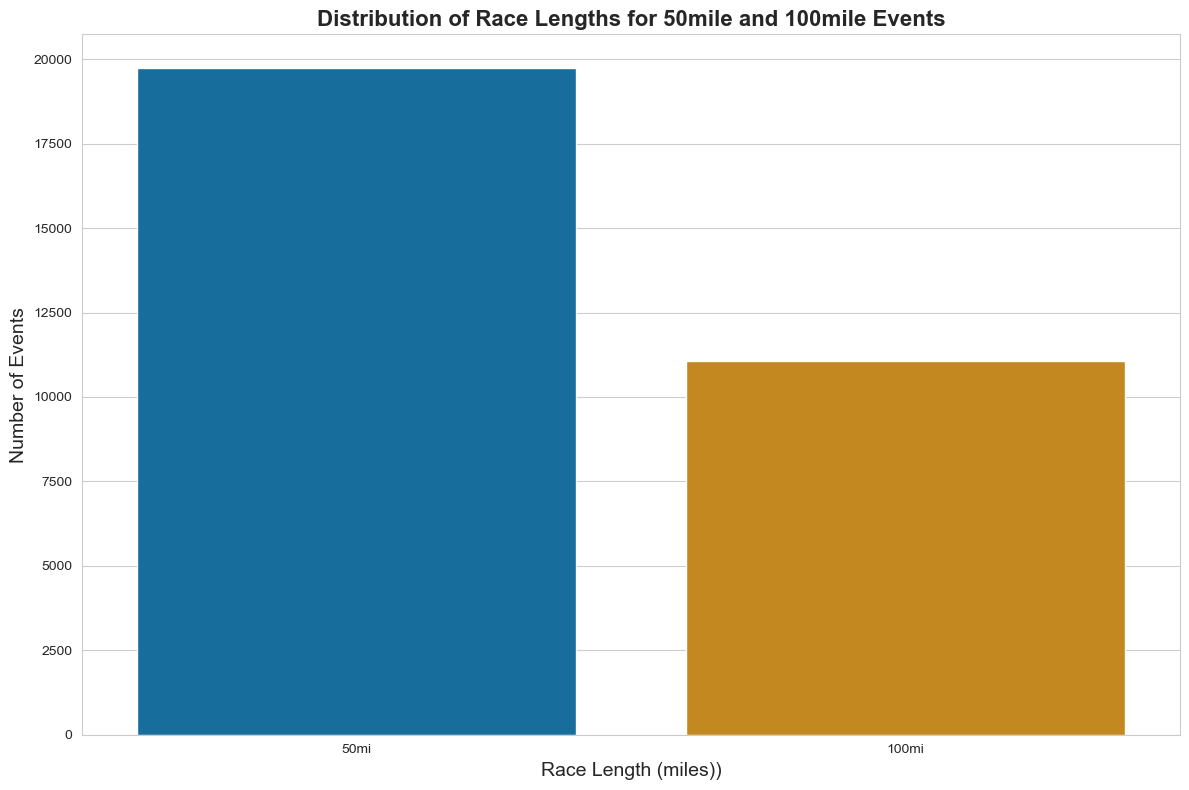

In [73]:
#Plotting the race length distribution


sns.set_style("whitegrid")
palette = sns.color_palette("colorblind", n_colors=2)
plt.figure(figsize=(12,8))
sns.countplot(data=fiftyor100, x='race_length', hue='race_length', palette=palette)
plt.title('Distribution of Race Lengths for 50mile and 100mile Events', fontsize=16, fontweight='bold')
plt.xlabel('Race Length (miles))', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
plt.tight_layout()
plt.show()

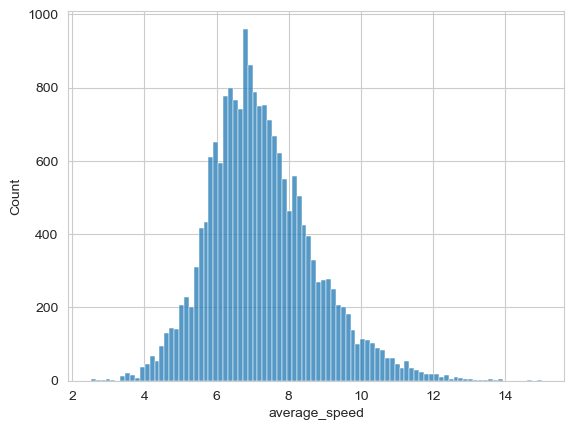

In [75]:
# Averge speed of athletes in 50 M 

miles  = fiftyor100[fiftyor100['race_length'] == '50mi']
sns.histplot(miles['average_speed'], kde = False)
plt.show()

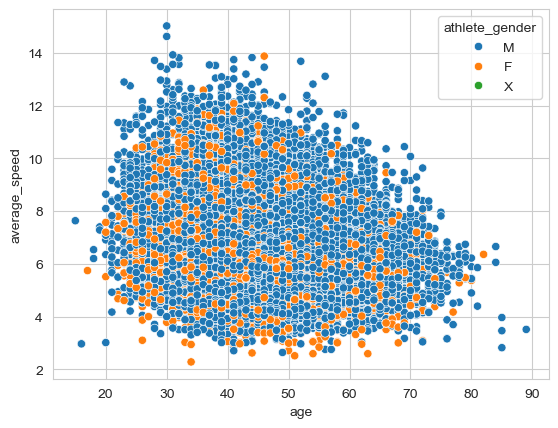

In [79]:
# Age vs Average speed distribution for different genders

sns.scatterplot(data = fiftyor100, x = 'age', y ='average_speed', hue = 'athlete_gender')
plt.show()

In [45]:
# Corrected filter for 50km races in Poland in 2016
filtered_data = data[
    (data['Event distance/length'] == '50km') &  # Filtering for 50km races
    (data['Event name'].str.contains('POL', case=False)) &  # Filter for events in Poland
    (data['Year of event'] == 2016)  # Filter for the year 2016
]

# Show the result
filtered_data

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
726544,2016,07.05.2016,Ultramaraton Podkarpacki 50km (POL),50km,161,4:17:02 h,Sportiva.PL,POL,1984.0,M,M23,11.672,399664
726545,2016,07.05.2016,Ultramaraton Podkarpacki 50km (POL),50km,161,4:23:59 h,Przemyski Klub Biegacz...,POL,1967.0,M,M45,11.364,212268
726546,2016,07.05.2016,Ultramaraton Podkarpacki 50km (POL),50km,161,4:25:16 h,21 Bdow,POL,1982.0,M,M23,11.309,399665
726547,2016,07.05.2016,Ultramaraton Podkarpacki 50km (POL),50km,161,4:26:42 h,*Godowa,POL,1970.0,M,M45,11.249,125942
726548,2016,07.05.2016,Ultramaraton Podkarpacki 50km (POL),50km,161,4:26:42 h,*Lubenia,POL,1990.0,M,M23,11.249,23898
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141449,2016,27.11.2016,Trail Toulouse Métropole (FRA),50km,125,6:59:16 h,Ramonville,FRA,1961.0,M,M50,7.155,526409
1141450,2016,27.11.2016,Trail Toulouse Métropole (FRA),50km,125,6:59:18 h,*Caraman,FRA,1968.0,M,M45,7.155,526410
1141451,2016,27.11.2016,Trail Toulouse Métropole (FRA),50km,125,7:02:37 h,*Marseille,FRA,1953.0,M,M60,7.099,85200
1141452,2016,27.11.2016,Trail Toulouse Métropole (FRA),50km,125,7:03:52 h,5 Doigts Toulouse,FRA,1995.0,F,WU23,7.078,251368


Taking a look at the 'athlete club' column where the State of Michigan (MI) appears

In [46]:
#used a regular expression here to exlcude any MIL values which would not be a Michigan Based Club.
# Filter for rows where 'athlete club' contains 'MI' 
filtered_data = data[data['Athlete club'].str.contains(r'MI$', case=True, na=False)]

# Display the filtered data
filtered_data

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
61,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,12:39:36 h,"*Wyoming, MI",USA,1979.0,M,M35,6.356,61
62,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,12:39:36 h,"*Grand Rapids, MI",USA,1977.0,F,W40,6.356,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7457537,1995,08.04.1995,GNC 50 Mile Run Challenge (USA),50mi,32,10:34:04 h,*MI,USA,1944.0,F,W50,7614.0,1049869
7457539,1995,08.04.1995,GNC 50 Mile Run Challenge (USA),50mi,32,11:34:50 h,*MI,USA,1942.0,M,M50,6948.0,1046442
7460788,1995,04.-05.02.1995,Rocky Raccoon 100 Mile Trail Run (USA),100mi,36,27:26:47 h,*MI,USA,1941.0,M,M50,5864.0,880735
7460791,1995,04.-05.02.1995,Rocky Raccoon 100 Mile Trail Run (USA),100mi,36,28:16:27 h,*MI,USA,1950.0,F,W40,5692.0,580784


Taking a Look at Badwater Ultramarathon (USA). I chose this race because it represents some of the extreme aspects of ultrarunning, such as taking place in California's Death Valley in mid-July where the temperatures can reach 130 degrees F during the Day. The race starts between the lowest and highest points in the contigious United States, Badwater, Death Valley at -282 and Mt. Whitney's summit at 14,505. Al Arnold is famed for having first completed the course in 1977 reaching Mt. Whitney after 84 hours. The race became offically organized in 1987.


In [47]:
#All data from our dataset about Badwater135.
badwater_data = data[data['Event name'] == 'Badwater Ultramarathon (USA)']

badwater_data

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
332607,2018,23.-25.07.2018,Badwater Ultramarathon (USA),135mi,69,24:51:47 h,"*Los Angeles, CA",ITA,1983.0,M,M23,8.738,129220
332608,2018,23.-25.07.2018,Badwater Ultramarathon (USA),135mi,69,25:33:42 h,"*Dallas, TX",USA,1988.0,M,M23,8.5,78982
332609,2018,23.-25.07.2018,Badwater Ultramarathon (USA),135mi,69,27:08:30 h,"*Littleton, CO",USA,1985.0,M,M23,8.005,224343
332610,2018,23.-25.07.2018,Badwater Ultramarathon (USA),135mi,69,28:14:12 h,"*Maderas, CA",MEX,1971.0,M,M45,7.694,165367
332611,2018,23.-25.07.2018,Badwater Ultramarathon (USA),135mi,69,28:23:10 h,"*Austin, TX",USA,1976.0,F,W40,7.654,224344
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7428408,1995,26.-28.07.1995,Badwater Ultramarathon (USA),135mi,16,2d 02:40:29 h,NaN,USA,1928.0,M,M65,4287.0,1044978
7428409,1995,26.-28.07.1995,Badwater Ultramarathon (USA),135mi,16,2d 03:26:15 h,NaN,USA,1940.0,M,M50,4224.0,1063835
7428410,1995,26.-28.07.1995,Badwater Ultramarathon (USA),135mi,16,2d 04:40:07 h,"*Idaho Springs, CO",USA,1951.0,M,M40,4125.0,177935
7428411,1995,26.-28.07.1995,Badwater Ultramarathon (USA),135mi,16,2d 04:40:07 h,NaN,USA,NaN,F,NaN,4125.0,1639277


In [48]:
#Finding the first year the Badwater UltraMarathon took place
first_year_bw = badwater_data['Year of event'].min()
print(f"First year of Badwater was {first_year_bw}")

First year of Badwater was 1987


In [49]:
#filter for the first year data
first_year_data = badwater_data[badwater_data['Year of event'] == first_year_bw]

#How many people finished the first year of Badwater?
# Assuming there's a 'Finishers' column, get the first instance
first_instance_finishers = first_year_data['Event number of finishers'].iloc[0]  # Access the first row
print(f"Number of finishers in the first year: {first_instance_finishers}")

Number of finishers in the first year: 5


Taking a look at the summary statistcs of Badwater using pandas

In [50]:
badwater_data_cleaned = badwater_data.drop(columns=['Year of event', 'Athlete ID'])

summary_stats_bw = badwater_data_cleaned.describe()

# Drop the 'count' row from the summary statistics
summary_statistics_cleaned = summary_stats_bw.drop(index='count')

# Display the modified summary statistics
summary_statistics_cleaned

,Event number of finishers,Athlete year of birth
mean,66.386219,1963.761377
std,19.925577,11.825729
min,3.000000,1928.000000
25%,57.000000,1956.000000
50%,73.000000,1964.000000
75%,79.000000,1972.000000
max,89.000000,1994.000000


Now we are going to try and visualize the distribution of the athlete gender at the Badwater Ultramarathon over the years.

First step will be to encode the gender column: Since the datatype of the column is object and we want to map() our genders to numerical values (M=1 and F=0)

Second step will be to group the data by year and gender

Third step will be to creaate a visualization

In [51]:
#Set the value using .loc, since we are using a slice (a subset of a DataFrame)
badwater_data.loc[:, 'Gender_encoded'] = badwater_data['Athlete gender'].map({'M': 1, 'F': 0})

C:\Users\user\AppData\Local\Temp\ipykernel_12264\1975604836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  badwater_data.loc[:, 'Gender_encoded'] = badwater_data['Athlete gender'].map({'M': 1, 'F': 0})


Group by Year and Gender, and calculate the count of each gender (M and F) for each year

In [52]:
# Group by year and athlete gender
gender_distribution = badwater_data.groupby(['Year of event', 'Athlete gender']).size().unstack()

# Fill NaN values with 0 (in case a year has no data for M or F)
gender_distribution = gender_distribution.fillna(0)

# Display the grouped data
gender_distribution.head()


Athlete gender,F,M
Year of event,,
1987,2.0,3.0
1988,1.0,2.0
1989,2.0,2.0
1990,3.0,14.0
1991,3.0,11.0


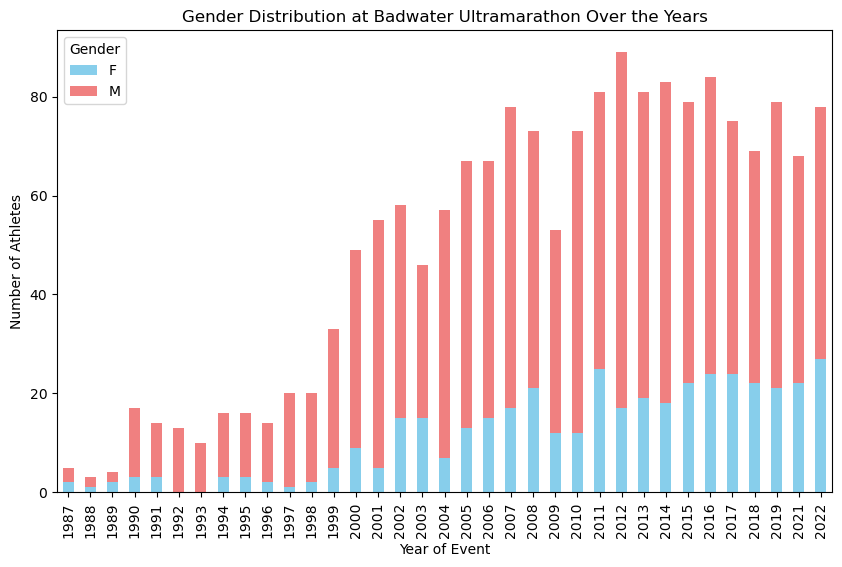

In [53]:
# Plot a stacked bar chart
gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

plt.title('Gender Distribution at Badwater Ultramarathon Over the Years')
plt.xlabel('Year of Event')
plt.ylabel('Number of Athletes')
plt.legend(title='Gender', labels=['F', 'M'])
plt.show()


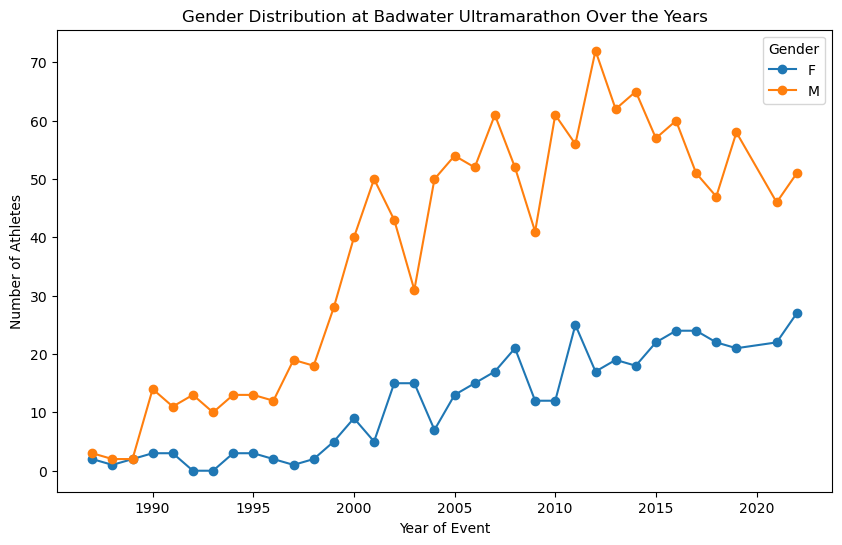

In [54]:
# Line plot for gender distribution
gender_distribution.plot(kind='line', figsize=(10, 6), marker='o')

plt.title('Gender Distribution at Badwater Ultramarathon Over the Years')
plt.xlabel('Year of Event')
plt.ylabel('Number of Athletes')
plt.legend(title='Gender', labels=['F', 'M'])
plt.show()
